# Importing the required libraries

In [46]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# load data

In [47]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [48]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [49]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

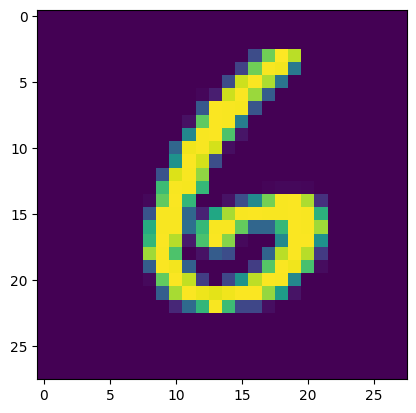

In [50]:
plt.imshow(x_train[6000])     #ploting the index=image

In [51]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [52]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [53]:
number_of_classes = 10  #storing the no of classes in a variable

In [54]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [55]:
#create model
model=Sequential ()

In [56]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [57]:
#flatten the dimension of the image
model.add(Flatten())

In [58]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [59]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [62]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [63]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2299 - accuracy: 0.9506 - val_loss: 0.0899 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0888 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0835 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.1145 - val_accuracy: 0.9708


# Observing the metrics

In [64]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1144733875989914, 0.97079998254776]


# Test The Model

In [65]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 84ms/step
[[1.4689527e-14 1.8748821e-17 2.3109615e-13 9.5624716e-07 3.1683821e-04
  2.4785629e-07 6.1842380e-18 6.2185841e-06 8.8746788e-07 9.9967492e-01]]


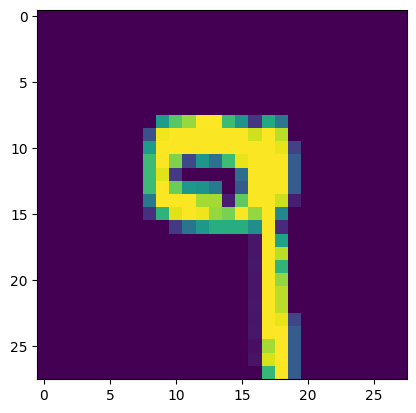

In [66]:
plt.imshow(x_test[6000])

In [67]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [68]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [70]:
# Save the model
model.save('models/mnistCNN.h5')